<a href="https://colab.research.google.com/github/ggo0619/docs-l10n/blob/master/HW_01)MNIST_GT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **과제 1에 대한 solution sample입니다. **

In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import os
from torch import nn

import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

100%|██████████| 9912422/9912422 [00:00<00:00, 110275428.55it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21233250.45it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29870648.03it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4864792.84it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

training data len :  60000
test data len :  10000


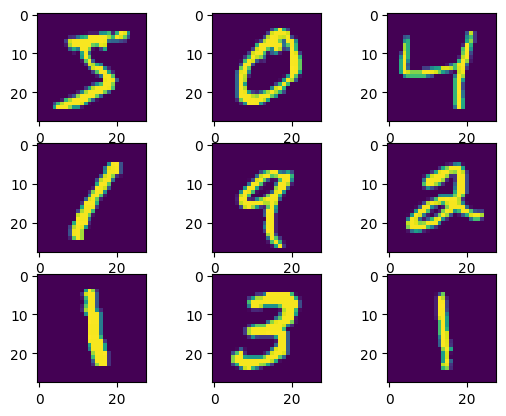

In [ ]:
training_data=MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data=MNIST(root="./", train=False, download=True, transform=ToTensor())

print("training data len : ",len(training_data))
print("test data len : ",len(test_data))

# data image 9장 불러오기 - plt 사용
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(training_data.data[i])
plt.show()

In [ ]:
from torch.utils.data import DataLoader

# train loader와 test loader 정의하기 (batch size : 32/ train : shuffle=True, test : shuffle=False)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
# 간단한 linear regression model 구현해보기

import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


In [ ]:
inputDim = 1 # 'x'의 차원이 1이 되는 이유를 설명하시오. : 단순한 선형회귀모델이므로 입력차원은 1이 된다./ 생성한 data의 차원이 1이라서 input dim이 1이기 떄문입니다.
outputDim = 1 # 'y'의 차원이 1이 되는 이유를 설명하시오. : 선형회귀 모델이므로, 입력값 x에 대한 단일값 y를 도출해내기 때문이다.

learningRate = 0.01
epochs = 100

model = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):

    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()
    # 기존의 학습 gradiant가 누적되면 다음 학습 gradiant에 영향을 미치므로, zero_grad()를 이용하여 0으로 gariant값을 초기화 시켜줍니다.

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    # 각 파라미터를 미분해서 gradiant를 계산하여 가중치를 업데이트하는데 이는 손실을 최소화를 하기 위해서입니다.
    print(loss)

    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(283.8836, grad_fn=<MseLossBackward0>)
epoch 0, loss 283.8835754394531
tensor(23.3472, grad_fn=<MseLossBackward0>)
epoch 1, loss 23.34716033935547
tensor(2.0939, grad_fn=<MseLossBackward0>)
epoch 2, loss 2.0938827991485596
tensor(0.3582, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.35820144414901733
tensor(0.2145, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.21453522145748138
tensor(0.2007, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.20074711740016937
tensor(0.1976, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.19757650792598724
tensor(0.1953, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.19529427587985992
tensor(0.1931, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.19310735166072845
tensor(0.1910, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.19095011055469513
tensor(0.1888, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.18881787359714508
tensor(0.1867, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.18670940399169922
tensor(0.1846, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.1846245229244232

[[ 0.5095934]
 [ 2.5802164]
 [ 4.6508393]
 [ 6.7214622]
 [ 8.792085 ]
 [10.862708 ]
 [12.933331 ]
 [15.003953 ]
 [17.074577 ]
 [19.1452   ]
 [21.215824 ]]


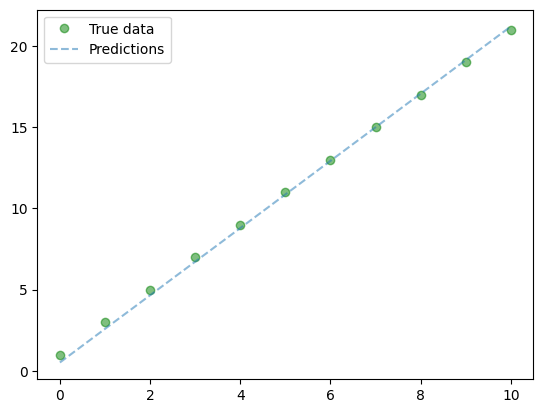

In [ ]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
"""
# (Linear regerssion이 왜 Neural network인지)
: 선형회귀 모델은 하나의 인공 뉴런으로 구성된 신경망(=단일층 신경망)으로 사용할 수 있으며, 선형회귀의 경우 모든 입력이 출력에 연결되어 있습니다.

# (해당 과제를 예시로 들어 설명)
: x_train은 0~10까지의 값을 포함하는 입력데이터를 나타내며, y_train은 x의 각 값에 대한 출력데이터입니다. 이것은 2*x +1관계에 있는 선형 데이터입니다.
: linearRegression를 사용하여 선형회귀 모델을 설정하는데 이 모델은 단일 입력=inputDim과 단일 출력=outputDim을 가지게 됩니다.
: MSE를 사용하여 모델의 예측값과 실제 값 사이의 오차를 최소화하려고 합니다.
: SDG를 사용하여 모델의 가중치와 편향을 조정하면서 손실을 최소화합니다.
"""